In [1]:
from gurobipy import *
import math
import copy
import matplotlib.pyplot as plt
import random
import decimal
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

In [2]:
def randomGen(n, limit):
    p = {}
    for i in range(n):
        p[i] = [random.randint(0, limit),random.randint(0, limit)]
    return p

In [3]:
def simple(x):
    return math.floor(x*100)/100
def orgDis(p, tar):
    dis = 0
    for i in range(len(p)-1):
        dis += math.sqrt(pow(p[i][0] - tar[0], 2) + pow(p[i][1] - tar[1], 2))
    return dis
def dense(p, mid):
    dis = 0
    for i in p:
        dis += simple(distance(p[i], mid))
    avg = dis / len(p)
    devi = 0
    for i in p:
        devi += pow(simple(distance(p[i], mid))-avg,2)
    if devi == 0:
        devi = 1
    return devi / (len(p)-1)

In [56]:
# k_p = {
# 0:[22,23],
# 1: [15,49],
# 2: [13,26],
# 3: [48, 40],
# # 4 :[47, 11],
# 4 : [5, 35],
# 5: [39, 11],
# 6: [30,20],
# 7: [45,5],
# 8:[0, 5],
# 9:[2,2]
# }
k_p = {
0:[32,23],
1: [25,20],
2: [28,12],
3: [22, 39],
# 4 :[47, 11],
4 : [1, 30],
5: [32, 10],
6: [43,46],
7: [9,8],
8:[31, 39],
9:[37,29]
}
# p = randomGen(5, 50)
# p = {
# 0:[5,32],
# 1: [11,50],
# 2: [31,9],
# 3: [5, 2],
# # 4 :[, 11],
# 4 : [10, 40],
# # 5: [39, 11],
# # 6: [30,20],
# # 7: [45,5],
# # 8:[0, 5],
# # 9:[2,2]
# }
tar = [0, 0]

In [6]:
def k_means(k, k_p):
    k_x = []
    k_y = []
    for i in k_p:
        k_x.append(k_p[i][0])
        k_y.append(k_p[i][1])
    df = pd.DataFrame({
        'x':k_x,
        'y':k_y
    })
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    labels = kmeans.predict(df)
    centroids = kmeans.cluster_centers_
    k_np = {}
    for i in range(len(centroids)): 
        k_np[i] = [simple(centroids[i][0]), simple(centroids[i][1])]
    return k_np, labels, centroids, df

In [7]:

def k_means_plt(plt1,labels, centroids,df, colmap):
#     fig = plt1.figure(figsize=(5, 5))
    
#     print(colmap)
    colors = list(map(lambda x: colmap[x+1], labels))

    plt1.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k', label = 'centroid')
    for idx, centroid in enumerate(centroids):
        plt.scatter(*centroid, color=colmap[idx+1], label = 'sheep position')
#     plt1.xlim(0, 80)
#     plt1.ylim(0, 80)
    plt1.show()
#     plt1.legend()


In [8]:
def maxL(p):
    max_x = 0
    ind_x = -1
    max_y = 0
    ind_y = -1
    for i in p:
        if p[i][0] > max_x:
            max_x = p[i][0]
            ind_x = i
        if p[i][1] > max_y:
            max_y = p[i][1]
            ind_y = i
    return ind_x, ind_y
# print(max(p))
def distance(x1, x2):
    return math.sqrt(pow(x1[0]-x2[0],2) + pow(x1[1]-x2[1],2))

In [9]:
# model = Model("Point")
# x = model.addVar(vtype = GRB.CONTINUOUS, name = 'x')
# x_2 = model.addVar(vtype = GRB.CONTINUOUS, name = 'x2')
# y = model.addVar(vtype = GRB.CONTINUOUS, name = 'y')
# y_2 = model.addVar(vtype = GRB.CONTINUOUS, name = 'y2')
# dis = {}
# m = {}
# disToTar = {}
# for i in p:
#     disToTar[i] = pow(tar[0]-p[i][0],2) + pow(tar[1]-p[i][1],2)
# for i in range(len(p)+1):
#     dis[i] = model.addVar(vtype = GRB.CONTINUOUS, name = 'dis{}'.format(i))
#     for j in range(2):
#         m[i,j] = model.addVar(vtype = GRB.BINARY, name = 'm{},{}'.format(i,j))
# ind_x, ind_y = max(p)
# model.addConstr(p[ind_x][0] >= x, name = '(x)')
# model.addConstr(p[ind_y][1] >= y, name = '(y)')
# model.addConstr(tar[0] <= x, name = '(x)')
# model.addConstr(tar[1] <= y, name = '(y)')

# count = 0
# model.addGenConstrPow( x, x_2, 2.0, name = "x2")
# model.addGenConstrPow( y, y_2, 2.0, name = "y2")
# for i in p:
#     disToP = m[int(i),0]*(x_2+y_2)-m[int(i),0]*2*(x*p[i][0] + y*p[i][1])+ m[int(i),0]*(pow(p[i][0],2)+ pow(p[i][1],2))
#     model.addConstr(dis[int(i)] == disToP + m[int(i),1]*disToTar[i], name = "(dis)")
# model.addConstr(dis[len(p)] >= pow(x-tar[0],2) + pow(y-tar[1],2), name = "(dis)")

# for i in p:
#     model.addConstr(m[i,0] + m[i,1] == 1, name = '(type)')
    
    
# lhs_t = LinExpr(quicksum(dis[i] for i in range(len(p)+1)))
# model.setObjective(lhs_t,GRB.MINIMIZE)
# model.params.NonConvex = 2
# model.update()
# model.display()
# model.optimize()
# print("Optimize value = ", model.ObjVal)


In [10]:
# for var in model.getVars(): 
#     if(var.varName == 'x' or var.varName == 'y'):
#         print('{name} : {val}'.format(name=var.varName, val = var.x))
#     if(var.varName[0] == 'm' and var.x > 0):
#         print('{name} : {val}'.format(name=var.varName, val = var.x))

In [11]:
# 微分，f'(x)，當前需手算

def diffx_2(x, y,p):
    val = 0
    for i in p:
        val += pow(y-p[i][1],2)/(pow(x-p[i][0],2)+pow(y-p[i][1],2))*math.sqrt(pow(x-p[i][0],2)+pow(y-p[i][1],2))
#     return pow(y-p[0][1],2)/(pow(x-p[0][0],2)+pow(y-p[0][1],2))*math.sqrt(pow(x-p[0][0],2)+pow(y-p[0][1],2)) + pow(y-p[1][1],2)/(pow(x-p[1][0],2)+pow(y-p[1][1],2))*math.sqrt(pow(x-p[1][0],2)+pow(y-p[1][1],2)) + pow(y-p[2][1],2)/(pow(x-p[2][0],2)+pow(y-p[2][1],2))*math.sqrt(pow(x-p[2][0],2)+pow(y-p[2][1],2))
    return val

def diffy_2(x, y,p):
    val = 0
    for i in p:
        val += pow(x-p[i][0],2)/(pow(x-p[i][0],2)+pow(y-p[i][1],2))*math.sqrt(pow(x-p[i][0],2)+pow(y-p[i][1],2))
#     return pow(x-p[0][0],2)/(pow(x-p[0][0],2)+pow(y-p[0][1],2))*math.sqrt(pow(x-p[0][0],2)+pow(y-p[0][1],2)) + pow(x-p[1][0],2)/(pow(x-p[1][0],2)+pow(y-p[1][1],2))*math.sqrt(pow(x-p[1][0],2)+pow(y-p[1][1],2)) + pow(x-p[2][0],2)/(pow(x-p[2][0],2)+pow(y-p[2][1],2))*math.sqrt(pow(x-p[2][0],2)+pow(y-p[2][1],2))
    return val

def diffx(x, y, p):
    val = 0
    for i in p:
        val +=  pow(math.sqrt(pow(x-p[i][0], 2) + pow(y-p[i][1],2)),-1)*(x-p[i][0])
    return val
#     return pow(math.sqrt(pow(x-p[0][0], 2) + pow(y-p[0][1],2)),-1/2)*(x-p[0][0]) + pow(math.sqrt(pow(x-p[1][0], 2) + pow(y-p[1][1],2)),-1/2)*(x-p[1][0])+pow(math.sqrt(pow(x-p[2][0], 2) + pow(y-p[2][1],2)),-1/2)*(x-p[2][0])

def diffy(x, y,p):
    val = 0
    for i in p:
        val += pow(math.sqrt(pow(x-p[i][0], 2) + pow(y-p[i][1],2)),-1)*(y-p[i][1])
#     return pow(math.sqrt(pow(x-p[0][0], 2) + pow(y-p[0][1],2)),-1/2)*(y-p[0][1]) + pow(math.sqrt(pow(x-p[1][0], 2) + pow(y-p[1][1],2)),-1/2)*(y-p[1][1])+pow(math.sqrt(pow(x-p[2][0], 2) + pow(y-p[2][1],2)),-1/2)*(y-p[2][1])
    return val
# y=f(x)
def f(x, y, p):
    val = 0
    for i in p:
        val += math.sqrt(pow(x-p[i][0], 2) + pow(y-p[i][1],2))
#     return math.sqrt(pow(x-p[0][0], 2) + pow(y-p[0][1],2)) + math.sqrt(pow(x-p[1][0], 2) + pow(y-p[1][1],2)) + math.sqrt(pow(x-p[2][0], 2) + pow(y-p[2][1],2))
    return val
def Newton(f, p,diffx, ini_valx = -50, ini_valy = -50, err=10**-13, maxiter = 1000, prt_step = False):
    x = ini_valx 
    y = ini_valy
    for i in range(maxiter):
        x -= diffx(x,y,p)/diffx_2(x,y,p)
        y -= diffy(x,y,p)/diffy_2(x,y,p)
        if prt_step == True:
            print(f"After {i+1} iteration, the solution is updated to {x}, f(x) is {f(x,y)}")
#         print(abs(f(x,y)))
        if abs(diffx(x,y,p)) < err and abs(diffy(x,y,p)) <err:
            break
    return x, y
    
def Binary(f, leftx, rightx, lefty, righty ,p,err=10**-13, maxiter = 100, prt_step = False):
    for i in range(maxiter):
        middlex = (leftx+rightx)/2
        middley = (lefty+righty)/2
        if prt_step == True:
            print(f"After {i+1} iteration, the solution is updated to {middle}, f(x) is {f(middle)}")
        if abs(diffx(middlex, middley,p))<err:
            break
        if diffx(leftx, lefty,p)*diffx(middlex, middley,p)<=0:
            rightx=middlex
        else:
            leftx=middlex
        if diffy(leftx, lefty,p)*diffy(middlex, middley,p)<=0:
            righty=middley
        else:
            lefty=middley
    return middlex, middley

def solve(p):
    func = lambda x, y :f(x,y,p)
    x, y = Binary(func, -10, 1- 10 ** -11, -10, 1- 10 ** -11,p ,err=10**-2)
#     print(str(x) + '\t' + str(y))
    return Newton(func, p,diffx, ini_valx = x, ini_valy = y)



In [45]:
def nestedToRecursion(counters,level, d, leng, done,ch, n_p):
    if level == d:
        computeOperation(counters,level,done,ch,n_p)
    else:
#         print(counters[level-3]+1)
        if level == 2:
            index = 0
        else:
            index = counters[level-2-1]+1
        for counters[level-2] in range(index, leng):
            nestedToRecursion(counters,level+1, d, leng, done, ch, n_p)

def computeOperation(counters,level,done,ch,n_p):
    flag = False
    curr_p = {}
    if not any(counters.count(element) > 1 for element in counters):
        for i in counters:
            if i in done:
                flag = True
        if not flag:
            count = 0
            for i in range(len(counters)):
                curr_p[count] = n_p[counters[i]]
                count += 1
#             if(count == 2):
            curr_p[count] = [tar[0], tar[1]]
#             print(curr_p)
            try:
                x,y = solve(curr_p)
            except OverflowError:
                x,y = [500,500]
            x = simple(x)
            y = simple(y)
            midDis = simple(f(x,y,curr_p))
            directDis = simple(orgDis(curr_p, curr_p[len(curr_p)-1]))
#             den = dense(curr_p, [x,y])
            if(midDis < directDis):
#                 #產生中繼點
                if (x,y,tuple(counters)) not in ch:
                    ch[x,y,tuple(counters)] = simple(directDis-midDis) / (midDis)
#             ch[x,y,tuple(counters)] = 1/den
#         print(counters[i])
#     print("\n")
#     print((x,y,tuple(counters)))


In [13]:


def generate_path(p, tar):
    n_p = copy.deepcopy(p)
    length = len(n_p)
    curr_p = {2:[tar[0], tar[1]]}
    done_node = []
    path = {}
    # init
    for i in range(len(n_p)):
        path[i] = [i]
    flag = True
    count = 0
    while(len(done_node) < len(n_p)):
#         print(done_node)
        count += 1
        #各點在此迴圈可做的選擇         
        choice = {}
        flag = False
        # n = 2
#         for i in range(len(n_p)):
#             for j in range(i+1, len(n_p)):
#                 if i not in done_node and j not in done_node:
#                     x = (n_p[i][0] + n_p[j][0]) / 2
#                     y = (n_p[i][1] + n_p[j][1]) / 2
#                     den = dense({0:n_p[i], 1:n_p[j], 2: tar}, [x,y])
#                     choice[x,y,tuple([i,j])] = 1/den
        for n in range(2, len(n_p) - len(done_node)+1):
            counter = list()
            for i in range(n):
                counter.append(0)
#         for i in range(0,len(n_p)):
#             for j in range(i+1,len(n_p)):
#                 if(i not in done_node and j not in done_node):
#                     curr_p[0] = n_p[i]
#                     curr_p[1] = n_p[j]
#                     x,y = solve(curr_p)
#                     x = simple(x)
#                     y = simple(y)
#                     midDis = simple(f(x,y,curr_p))
#                     directDis = simple(orgDis(curr_p, curr_p[2]))
#                     if(midDis < directDis):
#                         #產生中繼點
#                         if (x,y,(i,j)) not in choice:
#                             choice[x,y,(i,j)] = simple(directDis-midDis)
#                         flag = True
            nestedToRecursion(counter, 2, n+2, len(n_p), done_node, choice, n_p)
        
        choice = {k: v for k, v in sorted(choice.items(), key=lambda item: item[1], reverse = True)}
#         print(choice)
        #每個點做選擇
        if(len(choice) > 0):
            flag = False
            key = list(choice.keys())[0]
#             print(key)
            chose = False
            for ke in key[2]:
                if ke in done_node:
                    chose = True
            if not chose:
#             if(key[2][0] not in done_node and key[2][1] not in done_node):
                index = -1
                if [key[0], key[1]] not in n_p.values():
                    n_p[len(n_p)] = [key[0], key[1]] 
                    index = len(n_p) - 1
                else:
                    index = list(n_p.keys())[list(n_p.values()).index([key[0], key[1]])]
#                 print(index)
#                 print(key[2])
                for k in range(len(path)):
                    for ke in key[2]:
#                     if key[2][0] == path[k][len(path[k])-1] or key[2][1] == path[k][len(path[k])-1]:
                        if ke == path[k][len(path[k])-1] and index not in path[k]:
                            path[k].append(index)
                            if ke not in done_node:
                                done_node.append(ke)
#                         if key[2][0] not in done_node:
#                             done_node.append(key[2][0])
#                         if key[2][1] not in done_node:
#                             done_node.append(key[2][1])
                    
        else:
            for i in range(len(path)):
                path[i].append('end')
                done_node.append(i)
    return path, n_p


In [54]:
# print(labels[best_k])

In [15]:

def plot_show(p, n_p, path, png_name, colmap):
    # 繪圖用
    mid_p = []
    fin_p = []
    for i in range(len(p)):
        fin_p.append((p[i][0], p[i][1]))

    testx, testy = zip(*fin_p)
#     plt.plot(testx, testy, 'o', label = 'sheep position')
    for i in range(len(p), len(n_p)):
        mid_p.append((n_p[i][0], n_p[i][1]))
        fin_p.append((n_p[i][0], n_p[i][1]))
    fin_p.append((0,0))
    annotations=[]
    for i in range(len(n_p)):
        annotations.append(str(i)+'(' + str(n_p[i][0]) + ', ' + str(n_p[i][1]) + ')')
    #     annotations.append(str(i))
    testx, testy = zip(*mid_p)
    plt.plot(testx, testy, 'sr', label = 'middle position')
    plt.plot(0,0, 'og', label = 'target position')
    for k in range(len(path)):
        for i in range(len(path[k]) - 1):  # plot each connections
            idx = len(colmap)-1
            if(path[k][i+1] == 'end'):
                x, y = zip(fin_p[path[k][i]], fin_p[len(fin_p)-1])
            else:
                x, y = zip(fin_p[path[k][i]], fin_p[path[k][i+1]])
            if path[k][i] < len(p):
                idx = path[k][i]+1
            plt.plot(x, y, color = colmap[idx])
    for i, label in enumerate(annotations):
        plt.text(fin_p[i][0], fin_p[i][1],label, size = 8, weight = 'light', ha= 'left',va='bottom', wrap = False)
#     plt.axis([0,50,0,50])
    maxX, maxY = maxL(n_p)
    plt.xticks(range(0, maxX, 1))
    plt.yticks(range(0, maxY, 1))
    plt.legend()
    return plt
#     plt.show()
#     plt.savefig(png_name + '.png')

In [16]:
def pathDis(n_p, path):
    dis = {}
    done_path = {}
    for i in path:
        for j in range(len(path[i])-1):
            if path[i][j+1] == 'end':
                dis[path[i][j]] = simple(math.sqrt(pow(n_p[path[i][j]][0] - tar[0], 2) + pow(n_p[path[i][j]][1] - tar[1], 2)))
            else:
                dis[path[i][j]] = simple(math.sqrt(pow(n_p[path[i][j]][0] - n_p[path[i][j+1]][0], 2) + pow(n_p[path[i][j]][1] - n_p[path[i][j+1]][1], 2)))
    totaldis = 0
    for i in dis:
        totaldis += dis[i]
    return totaldis


In [49]:
def optPath(path, length, n_p, tar):
    group = {}
    new_pos = copy.deepcopy(n_p)
    for i in range(length+1):
        group[i] = list()
    for i in path:
        for j in range(1,len(path[i])):
#             print(str(path[i][j-1]) + str(path[i][j]))
            if path[i][j] == 'end':
                if path[i][j-1] not in group[length]:
                    group[length].append(path[i][j-1])
            else:
                if path[i][j-1] not in group[path[i][j]]:
                    group[path[i][j]].append(path[i][j-1])
#     print(group)
    for i in range(len(group)):
        if len(group[i]) == 0:
            del group[i]
    better = True
    count = 1
    while(better and count <= 100):
        
#         print('改善中，第' + str(count) + '次')
        count += 1
        better = False
        for i in range(length, len(path)-1,-1):
            if i < length:
                curr = {}
    #             find node i's next node
                for x in group:
                    if i in group[x]:
                        if x == length:
                            curr[x] = [tar[0],tar[1]]
                        else:
                            curr[x] = new_pos[x]
                        break
                for j in group[i]:
                    curr[j] = new_pos[j]
#                 print(curr)
                try:
                    x,y = solve(curr)
                except OverflowError:
                    x,y = [500,500]
                if simple(f(x,y,curr)) < simple(f(new_pos[i][0], new_pos[i][1], curr)):
                    new_pos[i] = [simple(x),simple(y)]
                    better = True
#                     print(new_pos)
    return new_pos


In [18]:
def disToCentro(k_p, cent, label):
    dis = 0
    for i in k_p:
        dis += distance(k_p[i], cent[label[i]])
    return dis
def printout(label, k_p, cent):
    group = {}
    for i in range(len(cent)):
        group[i] = list()
    for i in range(len(label)):
        group[label[i]].append(i)
    for i in group:
        stri = ''
        for j in group[i]:
            stri += str(j) + '(' + str(k_p[j][0]) + ', ' + str(k_p[j][1]) + ') '
        print('group ' + str(i) + ' : ' + stri + ', centro: (' + str(cent[i][0]) + ', ' + str(cent[i][1]) + ')')

In [ ]:
best_choice = {}
for k in range(10):
    print('current test: ' + str(k))
    k_p = randomGen(10, 500)
    labels = {}
    cent = {}
    cent_plt = {}
    pos = {}
    paths = {}
    best = 99999999
    best_k = -1
    obj = {}
    dfs = {}
    for i in range(2, 11):
#         print('k: ' + str(i))
        k_np, labels[i], cent_plt[i], dfs[i] = k_means(i, k_p)
        cent[i] = copy.deepcopy(k_np)
        path, n_p = generate_path(k_np, tar)
        paths[i] = copy.deepcopy(path)
        # print(path)
        # print(n_p)
    #     plot_show(k_np, n_p, path,'1')
    #     print('初始總路徑:')
    #     pathDis(n_p, path)
    #     print('\n\n進行改善:')
        new_pos = optPath(path, len(n_p), n_p, tar)
    #     print(new_pos)
    #     plot_show(k_np, new_pos, path, 'k_image')
    #     pathDis(new_pos, path)
        pos[i] = copy.deepcopy(new_pos)
        obj[i] = pathDis(new_pos, path) + disToCentro(k_p, new_pos, labels[i])
        if(obj[i] < best):
            best = obj[i]
            best_k = i 
    if best_k not in best_choice:
        best_choice[best_k] = 1
    else:
        best_choice[best_k] += 1
print(best_choice)

current test: 0
current test: 1


In [59]:
k_p = randomGen(20, 50)

k: 9
k: 10


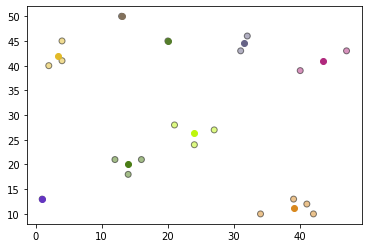

best_k: 9, val: 199.04341978288318


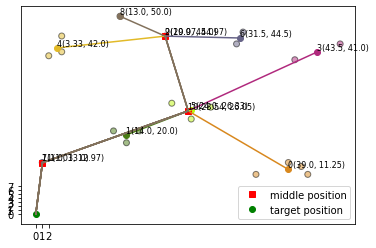

{9: 199.04341978288318, 10: 202.33107775886847}


In [60]:
labels = {}
cent = {}
cent_plt = {}
pos = {}
paths = {}
best = 99999999
best_k = -1
obj = {}
dfs = {}
for i in range(9, 11):
    print('k: ' + str(i))
    k_np, labels[i], cent_plt[i], dfs[i] = k_means(i, k_p)
    cent[i] = copy.deepcopy(k_np)
    path, n_p = generate_path(k_np, tar)
    paths[i] = copy.deepcopy(path)
    # print(path)
    # print(n_p)
#     plot_show(k_np, n_p, path,'1')
#     print('初始總路徑:')
#     pathDis(n_p, path)
#     print('\n\n進行改善:')
    new_pos = optPath(path, len(n_p), n_p, tar)
#     print(new_pos)
#     plot_show(k_np, new_pos, path, 'k_image')
#     pathDis(new_pos, path)
    pos[i] = copy.deepcopy(new_pos)
    obj[i] = pathDis(new_pos, path) + disToCentro(k_p, new_pos, labels[i])
    if(obj[i] < best):
        best = obj[i]
        best_k = i 
colmap = {}
for i in range(1,len(cent_plt[best_k])+2):
#     colmap = {1: 'r', 2: 'g', 3: 'b', 4:'y', 5:'purple'}
#         colmap[i] = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    colmap[i] = list(np.random.choice(range(256), size=3))
    for j in range(3):
        colmap[i][j] /= 255
plt2 = plt
k_means_plt(plt2, labels[best_k], cent_plt[best_k], dfs[best_k], colmap)
print('best_k: ' + str(best_k) + ', val: '+ str(best))
# print(pos[best_k])
plt1 = plot_show(cent[best_k], pos[best_k], paths[best_k], 'k_image', colmap)
k_means_plt(plt1, labels[best_k], cent_plt[best_k], dfs[best_k], colmap)
print(obj)

In [ ]:
# print(k_p)
k_npss, labelss, cent_pltss, df = k_means(5, k_p)
# print(labelss)
# print(k_npss)
printout(labelss, k_p, cent_pltss)
pathss, n_pss = generate_path(k_npss, tar)
# print(pathss)
# print(n_pss)
# plot_show(k_np, n_p, path,'1')

# print('\n初始總路徑: ' + str(pathDis(n_pss, pathss) + disToCentro(k_p, new_pos, labels[i])))

print('\n\n進行改善:')
new_poss = optPath(pathss, len(n_pss), n_pss, tar)
# print(new_poss)
plt2 = plot_show(k_npss, new_poss, pathss, 'k_image', colmap)
print('\n改善後總路徑: ' + str(pathDis(new_poss, pathss) + disToCentro(k_p, new_poss, labelss)))
k_means_plt(plt2, labelss, cent_pltss,df, colmap)


In [ ]:
def clearFile(filename):
    open(filename, 'w').close()

In [ ]:
filename = 'input_point_' + str(1) + '.txt'
f = open(filename, "a")
clearFile(filename)
f.write('n\t' + str(len(k_p)) + '\n')
f.write('k\t' + str(len(k_np)) + '\n')
f.write('k\t' + str(len(n_p) - len(k_np)) + '\n')
f.write('s\t' + str(tar[0]) + '\t' + str(tar[1]) + '\n')
for i in k_p:
    f.write('d\t' + str(i) + '\t' + str(k_p[i][0]) + '\t' + str(k_p[i][1]) + '\n')
for i in k_np:
    f.write('c\t' + str(i) + '\t' + str(k_np[i][0]) + '\t' + str(k_np[i][1]) + '\n')
for i in range(len(k_np),len(n_p)):
    f.write('h\t' + str(i) + '\t' + str(n_p[i][0]) + '\t' + str(n_p[i][1]) + '\n')
f.write('g\t')
for i in labels[[i]:
    f.write(str(i) + '\t')
f.write('\n')

for i in path:
    f.write('p')
    for j in path[i]:
        if j == 'end':
            f.write('\t-1')
        else:
            f.write('\t' + str(j))
    f.write('\n')
        
        
f.write('e')
f.close()

In [ ]:
# def totalDis(lists, dis): 
#     t = 0 
#     for i in lists: 
#         if i != 'end': 
#             t += dis[i] 
#     return t

# def maxDis(lists,dis): 
#     ind = -1
#     maxi = 0 
#     for i in lists: 
#         if dis[i] > maxi:
#             maxi = dis[i]
#             ind = i 
#     return ind 
# def minimum(lists, c_path, index, goal):
#     ind = -1
#     mini = 99999
#     for i in lists:
# #         print(lists[i] + distance(n_p[c_path[len(c_path)-1]], n_p[index]))
# #         print(c_path)
#         if len(c_path[i]) == 0:
#             if lists[i] < mini:
#                 mini = lists[i]
#                 ind = i 
#         else:
#             if c_path[i][len(c_path[i])-1] == 'end':
#                 if lists[i] + distance(goal, n_p[index]) < mini:
#                     mini = lists[i] + distance(goal, n_p[index])
#                     ind = i 
#             else:
#                 if lists[i] + distance(n_p[c_path[i][len(c_path[i])-1]], n_p[index]) < mini:
#                     mini = lists[i] + distance(n_p[c_path[i][len(c_path[i])-1]], n_p[index])
#                     ind = i 
#     return ind
# def minimums(lists):
#     ind = -1
#     mini = 9999 
#     for i in lists: 
#         if lists[i] < mini:
#             mini = lists[i]
#             ind = i 
#     return ind 

In [ ]:
# V = 3
# jun = {}
# totalD = {}
# # 兩台車分配
# c1 = []
# c2 = []
# edges = {}
# for i in path:
#     totalD[i] = totalDis(path[i], dis)
#     for j in range(len(path[i])-1):
#         if path[i][j] not in edges:
# #             print(path[i][j], dis[0])
#             edges[path[i][j]] = (path[i][j], path[i][j+1])
#         if path[i][j+1] == 'end' or path[i][j+1] > len(p)-1:
#             totalD[path[i][j+1]] = totalDis(path[i][j+1:], dis)
#             if path[i][j+1] not in jun:
#                 jun[path[i][j+1]] = [path[i][j]]
#             elif path[i][j] not in jun[path[i][j+1]]:
#                 jun[path[i][j+1]].append(path[i][j])
# # print(edges)
# t = {} #edge i 結束的時間
# curr_t = 0
# D = 2
# c_t = {}
# c_path = {}
# for i in range(1, D+1):
#     c_t[i] = 0
#     c_path[i] = []
# done = []
# undone = []
# processing = []
# for i in range(0,len(p)):
#     undone.append(i)
# while(len(undone) > 0 or len(processing) > 0):
#     if maxDis(undone, totalD) == -1:
#         x = {k: v for k, v in sorted(c_t.items(), key=lambda item: item[1])}
#         curr = 1
#         while(curr_t >= list(x.values())[curr]):
#             curr += 1
#         curr_t = list(x.values())[curr]
#         for i in c_t:
#             if c_t[i] < curr_t:
#                 c_path[i].append('waiting ' + str(curr_t - c_t[i]) + ' s')
# #                 c_t[i] = curr_t
#     elif len(undone) > 0:
#         index = maxDis(undone, totalD)
#         c_ind = minimums(c_t)
#         print('Drone ' + str(c_ind) + ' takes edge ' + str(edges[index]) + ', current time: ' + str(curr_t))
#         c_path[c_ind].append(edges[index])
#         t[index] = simple((dis[index]/V)) + curr_t
#         undone.remove(index)
#         processing.append(index)
#         c_t[c_ind] = t[index]
#         curr_t = c_t[minimums(c_t)]
#     for i in range(len(n_p)):
#         if i in t and (i not in done and i in processing) and t[i] <= curr_t:
#             processing.remove(i)
#             done.append(i)
#     #check middle points
#     for i in range(len(p), len(n_p)):
#         if i not in done and i not in undone and i not in processing:
#             flag = False
#             for j in jun[i]:
#                 if j not in done:
#                     flag = True
#             if not flag:
#                 undone.append(i)

                
# t_window = {}
# for i in c_path:
#     t_window[i] = [0]
#     print('\nDrone ' + str(i) + ' : \n')
#     print(c_path[i])
#     for j in c_path[i]:
#         if j[0] == 'w':
#             t_window[i].append(t_window[i][-1] + float(j.split(' ', 3)[1]))
#         else:
#             t_window[i].append(t_window[i][-1] + simple((dis[j[0]]/V)))
# #     print(t_window[i][1:])
            
# print('\n\ntotal time: ' + str(curr_t) + ' s')

In [ ]:
# V = 3*math.sqrt(2)
# jun = {}
# totalD = {}
# # 兩台車分配
# c1 = []
# c2 = []
# edges = {}
# for i in path:
#     totalD[i] = totalDis(path[i], dis)
#     for j in range(len(path[i])-1):
#         if path[i][j] not in edges:
# #             print(path[i][j], dis[0])
#             edges[path[i][j]] = (path[i][j], path[i][j+1])
#         if path[i][j+1] == 'end' or path[i][j+1] > len(p)-1:
#             totalD[path[i][j+1]] = totalDis(path[i][j+1:], dis)
#             if path[i][j+1] not in jun:
#                 jun[path[i][j+1]] = [path[i][j]]
#             elif path[i][j] not in jun[path[i][j+1]]:
#                 jun[path[i][j+1]].append(path[i][j])
# # print(edges)
# t = {} #edge i 結束的時間
# curr_t = 0
# D = 1
# c_t = {}
# c_path = {}
# c_pathsss = {}
# for i in range(D):
#     c_t[i] = 0
#     c_path[i] = []
#     c_pathsss[i] = []
# done = []
# undone = []
# processing = []
# for i in range(0,len(p)):
#     undone.append(i)
# print(totalD)
# while(len(undone) > 0 or len(processing) > 0):
#     if maxDis(undone, totalD) == -1:
#         x = {k: v for k, v in sorted(c_t.items(), key=lambda item: item[1])}
#         curr = 1
#         while(curr_t >= list(x.values())[curr]):
#             curr += 1
#         curr_t = list(x.values())[curr]
#         for i in c_t:
#             if c_t[i] < curr_t:
#                 c_path[i].append('waiting ' + str(curr_t - c_t[i]) + ' s')
# #                 c_t[i] = curr_t
#     elif len(undone) > 0:
#         index = maxDis(undone, totalD)
#         c_ind = minimum(c_t, c_pathsss, index, tar)
#         print('Drone ' + str(c_ind) + ' takes edge ' + str(edges[index]) + ', current time: ' + str(curr_t))
#         c_path[c_ind].append(edges[index])
#         if len(c_pathsss[c_ind]) == 0:
#             t[index] = simple(dis[index]/V) +  + curr_t
#         else:
#             t[index] = simple((dis[index]+distance(n_p[c_pathsss[c_ind][len(c_pathsss[c_ind])-1]], n_p[index]))/V) + curr_t
# #         c_pathsss[c_ind].append(edges[index][0])
#         c_pathsss[c_ind].append(edges[index][1])    
#         undone.remove(index)
#         processing.append(index)
#         c_t[c_ind] = t[index]
#         curr_t = c_t[minimum(c_t, c_pathsss, index, tar)]
#     for i in range(len(n_p)):
#         if i in t and (i not in done and i in processing) and t[i] <= curr_t:
#             processing.remove(i)
#             done.append(i)
#     #check middle points
#     for i in range(len(p), len(n_p)):
#         if i not in done and i not in undone and i not in processing:
#             flag = False
#             for j in jun[i]:
#                 if j not in done:
#                     flag = True
#             if not flag:
#                 undone.append(i)

                
# t_window = {}
# for i in c_path:
#     t_window[i] = [0]
#     print('\nDrone ' + str(i) + ' : \n')
#     print(c_path[i])
#     print(c_pathsss[i])
# #     for j in c_path[i]:
# #         if j[0] == 'w':
# #             t_window[i].append(t_window[i][-1] + float(j.split(' ', 3)[1]))
            
# #         else:
# #             t_window[i].append(t_window[i][-1] + simple((dis[j[0]]/V)))
# #             print(dis(n_p[j[0]], n_p[]))
# #     print(t_window[i][1:])
            
# print('\n\ntotal time: ' + str(curr_t) + ' s')

In [ ]:

# def farest(p_posi, goal, undone, curr):
#     max = 0
#     ind = -1
#     for i in range(len(p_posi)):
#         if(distance(p_posi[i], goal) > max) and i in undone and i not in curr:
#             ind = i
#             max = distance(p_posi[i], goal)
#     return ind
# def closest(p_posi, c_posi, curr):
#     min = 99999
#     ind = -1
#     for i in range(len(c_posi)):
#         if(distance(c_posi[i], p_posi) < min) and i not in curr:
#             min = distance(c_posi[i], p_posi)
#             ind = i
#     return ind
# def method1(C, p, goal, V):
#     count = 0
#     c_path = {}
#     undone = []
#     p_posi = {}
#     c_posi = {}
#     curr_p = []
#     curr_d = []
#     for i in range(C):
#         c_path[i] = list()
#         c_posi[i] = [0, 0]
#     for i in p:
#         p_posi[i] = p[i]
#         undone.append(i)
#     while not (len(undone) == 0):
# #         if count >= 990:
# #             print(count)
#         #找到最遠的羊
#         curr_p = list()
#         curr_d = list()
#         for n in range(min(len(undone), C)):
#             index = farest(p_posi, goal, undone, curr_p)
#             curr_p.append(index)
#             #找離羊最近的無人機
#             player = closest(p_posi[index], c_posi, curr_d)
#             curr_d.append(player)
#             c_path[player].append(index)
#             #update 羊、無人機位置
#             #如果兩者距離為0
#             if(distance(c_posi[player], p_posi[index]) < 15):
#                 p_posi[index][0] += (goal[0] - p_posi[index][0])*V/distance(p_posi[index], goal)
#                 p_posi[index][1] += (goal[1] - p_posi[index][1])*V/distance(p_posi[index], goal)
#                 c_posi[player] = copy.deepcopy(p_posi[index])
#             else:
#                 c_posi[player][0] += (p_posi[index][0] - c_posi[player][0])*V/distance(c_posi[player], p_posi[index])
#                 c_posi[player][1] += (p_posi[index][1] - c_posi[player][1])*V/distance(c_posi[player], p_posi[index])
                
#         #update undone list         
#         for i in undone:
#             if distance(p_posi[i], goal) <= 15:
#                 undone.remove(i)
#         count += 1
#     return c_path, count

In [ ]:
# C = 1
# V = 30
# p = {
# 0:[50,320],
# 1: [110,500],
# 2: [310,90],
# 3: [50, 20],
# # 4 :[47, 11],
# 4 : [100, 400]
# # 5: [25, 37],
# # 6: [50,30],
# }
# goal = [0, 0]
# c_path, count = method1(C, p, goal, V)
# print('Total Time: ' + str(count) + ' s')
# # print('#Drones: ' + str(C))
# # for i in c_path:
# #     print('Drone ' + str(i) + ' : ')
# #     print(c_path[i])
# # print(p_posi)